In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import torch
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
from model.utils import fix_seed

fix_seed(2025)

warnings.filterwarnings('ignore')
# Environment configuration. SpatialGlue pacakge can be implemented with either CPU or GPU. GPU acceleration is highly recommend for imporoved efficiency.
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Load data
file_fold = '/data/hulei/ZhaoruiJiang/Data/SpatialGlue/'
adata_omics1 = sc.read_h5ad(file_fold + 'Dataset1_Mouse_Spleen1/adata_RNA.h5ad')
adata_omics2 = sc.read_h5ad(file_fold + 'Dataset1_Mouse_Spleen1/adata_ADT.h5ad')
# adata_omics1 = sc.read_h5ad(file_fold + 'Dataset5_Mouse_Thymus3/adata_RNA.h5ad')
# adata_omics2 = sc.read_h5ad(file_fold + 'Dataset5_Mouse_Thymus3/adata_ADT.h5ad')
# adata_omics1 = sc.read_h5ad(file_fold + 'Dataset11_Human_Lymph_Node_A1/adata_RNA.h5ad')
# adata_omics2 = sc.read_h5ad(file_fold + 'Dataset11_Human_Lymph_Node_A1/adata_ADT.h5ad')
adata_omics1.var_names_make_unique()
adata_omics2.var_names_make_unique()
test_adata_omics1 = sc.read_h5ad(file_fold + 'Dataset2_Mouse_Spleen2/adata_RNA.h5ad') 
test_adata_omics2 = sc.read_h5ad(file_fold + 'Dataset2_Mouse_Spleen2/adata_ADT.h5ad')
# test_adata_omics1 = sc.read_h5ad(file_fold + 'Dataset4_Mouse_Thymus2/adata_RNA.h5ad')
# test_adata_omics2 = sc.read_h5ad(file_fold + 'Dataset4_Mouse_Thymus2/adata_ADT.h5ad')
# test_adata_omics1 = sc.read_h5ad(file_fold + 'Dataset12_Human_Lymph_Node_D1/adata_RNA.h5ad')
# test_adata_omics2 = sc.read_h5ad(file_fold + 'Dataset12_Human_Lymph_Node_D1/adata_ADT.h5ad')
test_adata_omics1.var_names_make_unique()
test_adata_omics2.var_names_make_unique()

In [2]:
test_adata_omics2.to_df()

CD29   CD3  F4_80  CD169_siglec   CD4   CD19  CD105  \
AAACACCAATAACTGC-1   61.0  62.0   87.0          63.0  41.0   67.0   52.0   
AAACAGAGCGACTCCT-1   21.0  45.0   18.0          33.0  46.0  101.0   23.0   
AAACAGCTTTCAGAAG-1   46.0  32.0  135.0          25.0  28.0   19.0   34.0   
AAACAGGGTCTATATT-1  135.0  84.0  485.0          40.0  89.0   70.0  116.0   
AAACATGGTGAGAGGA-1   96.0  68.0  311.0          41.0  49.0   74.0   76.0   
...                   ...   ...    ...           ...   ...    ...    ...   
TTGTTCAGTGTGCTAC-1   30.0  57.0   45.0          28.0  36.0   33.0   22.0   
TTGTTGTGTGTCAAGA-1   31.0  50.0   25.0          41.0  46.0   88.0   26.0   
TTGTTTCACATCCAGG-1   20.0  52.0   21.0          48.0  42.0   68.0   27.0   
TTGTTTCATTAGTCTA-1   42.0  36.0   42.0          96.0  27.0   65.0   38.0   
TTGTTTCCATACAACT-1   40.0  36.0  126.0          19.0  33.0   27.0   25.0   

                      CD8  B220_CD45R  Ly6C  ...   CD68  EpCAM  CD163  Ly6G  \
AAACACCAATAACTGC-1   79.0        69.0  10.0  ...  151.0    5.0   17.0  15.0   
AAACAGAGCGACTCCT-1   41.0        95.0  10.0  ...   39.0    4.0   12.0  10.0   
AAACAGCTTTCAGAAG-1   63.0        30.0   6.0  ...  133.0    9.0   28.0  16.0   
AAACAGGGTCTATATT-1  120.0        77.0  23.0  ...  475.0   15.0  152.0  38.0   
AAACATGGTGAGAGGA-1  100.0        78.0  19.0  ...  415.0   17.0   87.0  20.0   
...                   ...         ...   ...  ...    ...    ...    ...   ...   
TTGTTCAGTGTGCTAC-1   52.0        36.0   8.0  ...   84.0    4.0   19.0   9.0   
TTGTTGTGTGTCAAGA-1   51.0        89.0  10.0  ...   67.0    4.0   18.0   3.0   
TTGTTTCACATCCAGG-1   43.0        82.0   8.0  ...   36.0    9.0   19.0   7.0   
TTGTTTCATTAGTCTA-1   29.0        88.0   9.0  ...   72.0    5.0   12.0  14.0   
TTGTTTCCATACAACT-1   52.0        48.0   5.0  ...  174.0    3.0   56.0  12.0   

                     CD38   IgM    IgD  MadCAM1  CD20  CD11b  
AAACACCAATAACTGC-1  164.0  12.0  318.0     16.0  13.0   28.0  
AAACAGAGCGACTCCT-1  129.0  17.0  420.0      8.0  11.0   20.0  
AAACAGCTTTCAGAAG-1   62.0  15.0  115.0      6.0  10.0   24.0  
AAACAGGGTCTATATT-1  303.0  73.0  317.0     17.0  25.0   72.0  
AAACATGGTGAGAGGA-1  203.0  28.0  264.0     25.0  25.0   47.0  
...                   ...   ...    ...      ...   ...    ...  
TTGTTCAGTGTGCTAC-1  117.0  13.0  214.0     10.0   9.0   27.0  
TTGTTGTGTGTCAAGA-1  141.0   8.0  409.0      6.0  11.0   23.0  
TTGTTTCACATCCAGG-1  138.0  15.0  349.0     10.0   9.0   13.0  
TTGTTTCATTAGTCTA-1  172.0   9.0  262.0     10.0   7.0   24.0  
TTGTTTCCATACAACT-1  137.0  20.0  211.0      6.0   8.0   30.0  

[2768 rows x 21 columns]

In [3]:
from model.utils import pca
from model.utils import clr_normalize_each_cell

In [4]:
#Normalization
sc.pp.highly_variable_genes(adata_omics1, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata_omics1, target_sum=1e4)
sc.pp.log1p(adata_omics1)
sc.pp.scale(adata_omics1)
sc.pp.highly_variable_genes(test_adata_omics1, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(test_adata_omics1, target_sum=1e4)
sc.pp.log1p(test_adata_omics1)
sc.pp.scale(test_adata_omics1)

In [5]:
clr_normalize_each_cell(adata_omics2)
# sc.pp.normalize_total(adata_omics2)
# sc.pp.log1p(adata_omics2)
sc.pp.scale(adata_omics2)
clr_normalize_each_cell(test_adata_omics2)
# sc.pp.log1p(test_adata_omics2)
# sc.pp.normalize_total(test_adata_omics2)
# sc.pp.log1p(test_adata_omics2)
sc.pp.scale(test_adata_omics2)

In [6]:
adata_omics1_high = adata_omics1[:, adata_omics1.var['highly_variable']]
adata_omics1.obsm['feat'] = pca(adata_omics1_high, n_comps=adata_omics2.n_vars-1)

test_adata_omics1_high = test_adata_omics1[:, test_adata_omics1.var['highly_variable']]
test_adata_omics1.obsm['feat'] = pca(test_adata_omics1_high, n_comps=test_adata_omics2.n_vars-1)

In [7]:
adata_omics2 = adata_omics2[adata_omics1.obs_names].copy() 
adata_omics2.obsm['feat'] = pca(adata_omics2, n_comps=adata_omics2.n_vars-1)
test_adata_omics2 = test_adata_omics2[test_adata_omics1.obs_names].copy() 
test_adata_omics2.obsm['feat'] = pca(test_adata_omics2, n_comps=test_adata_omics2.n_vars-1)

In [8]:
from model.utils import Cal_Spatial_Net

Cal_Spatial_Net(adata_omics1, model="KNN", n_neighbors=3)
Cal_Spatial_Net(adata_omics2, model="KNN", n_neighbors=3)
Cal_Spatial_Net(test_adata_omics1, model="KNN", n_neighbors=3)
Cal_Spatial_Net(test_adata_omics2, model="KNN", n_neighbors=3)

The graph contains 7704 edges, 2568 cells.
3.0000 neighbors per cell on average.
The graph contains 7704 edges, 2568 cells.
3.0000 neighbors per cell on average.
The graph contains 8304 edges, 2768 cells.
3.0000 neighbors per cell on average.
The graph contains 8304 edges, 2768 cells.
3.0000 neighbors per cell on average.


In [9]:
from model.utils import Mutual_Nearest_Neighbors
anchors1, positives1, negatives1 = Mutual_Nearest_Neighbors(adata_omics1, key="feat", n_nearest_neighbors=4,
                                                            farthest_ratio=0.6)
anchors2, positives2, negatives2 = Mutual_Nearest_Neighbors(adata_omics2, key="feat", n_nearest_neighbors=4,
                                                            farthest_ratio=0.6)

distances calculation completed!
The data use feature 'feat' contains 3136 mnn_anchors
distances calculation completed!
The data use feature 'feat' contains 4158 mnn_anchors


In [10]:
# adata_omics2.X = adata_omics2.X.toarray()

In [11]:
adata_omics2.X.shape

(2568, 21)

In [12]:
from model.train import train_STProtein

In [13]:
out, model = train_STProtein(adata = adata_omics1,
                  ground_truth= torch.FloatTensor(adata_omics2.X),
                  feature_key="feat",
                  edge_key="edgeList",
                  weights=[5,3], #1:5
                  n_epochs=15000,
                  weight_decay=0.001
                  )

100%|██████████████████████████████████████████████████████████████████████████████████| 15000/15000 [03:33<00:00, 70.36it/s]


100%|██████████| 10000/10000 [02:27<00:00, 67.79it/s]


In [14]:
# import torch
# from tqdm import tqdm

# from model.model import SMART,SAGEConv_Encoder,SAGEConv_Decoder
# import torch.nn.functional as F


# def train_STProteinv2(adata, ground_truth ,triplet_samples, feature_key="feat", edge_key="edgeList", weights=None,emb_dim=64, n_epochs=500,
#                lr=0.0001,weight_decay=1e-5,device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
#     x1, edge_index1 = torch.FloatTensor(adata.obsm[feature_key]), torch.LongTensor(adata.uns[edge_key])
#     emb_dim = ground_truth.shape[1]
#     target = ground_truth.to(device)
#     print(x1)
    
#     print(edge_index1)
#     anchors1, positives1, negatives1 = triplet_samples
#     print(x1.shape)
#     hidden_dims=[x1.shape, emb_dim]
#     print(hidden_dims)
#     model = SMART(hidden_dims=[x1.shape[1], emb_dim])

#     x1, edge_index1= x1.to(device), edge_index1.to(device)
#     model.to(device)
    
#     n_epochs = n_epochs
#     loss_list = []
#     w1, w2 = weights
#     optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=weight_decay)
    
#     for epoch in tqdm(range(1, n_epochs + 1)):
#         model.train()
#         optimizer.zero_grad()
#         z, x1_rec= model(x1, edge_index1)
    
#         anchor_arr1 = x1_rec[anchors1,]
#         positive_arr1 = x1_rec[positives1,]
#         negative_arr1 = x1_rec[negatives1,]
    
#         triplet_loss = torch.nn.TripletMarginLoss(margin=1, p=2, reduction='mean')
#         tri_output1 = triplet_loss(anchor_arr1, positive_arr1, negative_arr1)

    
#         loss = w1 * F.mse_loss(x1, x1_rec) + w2*tri_output1 + w1*F.mse_loss(target, z)
#         loss_list.append(loss.item())
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
#         optimizer.step()

    
#     model.eval()
#     x1, edge_index1 = x1.to(device), edge_index1.to(device)
#     z, x1_rec = model(x1, edge_index1)

#     return z, model
        
    


In [15]:
# out, model = train_STProteinv2(adata = adata_omics1,
#                   ground_truth= torch.FloatTensor(adata_omics2.X),
#                   triplet_samples=(anchors1, positives1, negatives1),
#                   feature_key="feat",
#                   edge_key="edgeList",
#                   weights=[1, 1],
#                   n_epochs=1000,
#                   weight_decay=0.001)

In [16]:
out

tensor([[ 0.9668, -0.3405,  1.4573,  ..., -0.3634,  0.3368,  0.3509],
        [ 0.0816, -0.4755,  0.2928,  ..., -0.2164,  0.6119,  0.4719],
        [ 0.6341, -0.2497,  1.0344,  ..., -0.1767,  0.7584,  0.3440],
        ...,
        [-1.5476, -0.6234, -2.2513,  ...,  1.2655, -0.0643, -0.8731],
        [-0.0292, -0.7236, -0.1193,  ..., -0.0047, -0.3212,  0.2682],
        [-0.2444, -0.1756, -0.1441,  ...,  0.1454, -0.2967, -0.2320]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [17]:
target_1 = torch.FloatTensor(adata_omics2.X).to(device)

In [18]:
target_1

tensor([[ 3.8696e-01, -7.9073e-01,  1.0201e+00,  ...,  3.4029e-01,
          1.4983e+00,  1.5580e-03],
        [ 1.1726e-01, -3.8198e-01,  9.9352e-01,  ...,  1.4355e-01,
          8.8152e-01, -1.5913e+00],
        [ 1.1478e+00, -7.0356e-01,  1.3194e+00,  ...,  1.0914e+00,
          5.2595e-01,  8.2766e-01],
        ...,
        [-1.3122e+00, -5.8690e-01, -1.2546e+00,  ...,  9.0447e-01,
          3.2206e-01, -1.1701e+00],
        [ 1.5454e+00, -2.7987e-01,  2.8727e-01,  ..., -1.2893e+00,
         -2.5376e-01,  7.8028e-01],
        [ 4.7778e-01, -1.5890e-01, -7.2433e-01,  ...,  3.5242e-01,
         -2.4375e+00,  1.0228e+00]], device='cuda:0')

In [19]:
import torch.nn.functional as F
F.mse_loss(target_1, out)

tensor(0.6859, device='cuda:0', grad_fn=<MseLossBackward0>)

In [20]:
from sklearn import metrics
def RMSE(true,pred):
    true_array = np.array(true,dtype=np.float32).flatten()
    pred_array = np.array(pred,dtype=np.float32).flatten() 
    rmse = metrics.mean_squared_error(true_array, pred_array)**0.5
    return rmse

In [21]:
RMSE(target_1.to('cpu').detach().numpy(), out.to('cpu').detach().numpy())

0.8281854211609728

In [22]:
# sc.pl.spatial(adata_omics2, 
#               color=adata_omics2.var_names.tolist(),  
#               spot_size=2,      
#               palette='viridis',   
#               vmax='p95',vmin='p50',
#               show=True)          
# plt.show()

In [23]:
train_predict = adata_omics2.copy()
train_predict.X = out.to('cpu').detach().numpy()

In [24]:
# sc.pl.spatial(train_predict, 
#               color=adata_omics2.var_names.tolist(),  
#               spot_size=2,      
#               palette='viridis',   
#               vmax='p95',vmin='p50',
#               show=True)          
# plt.show()

In [25]:
# def continue_STProtein(model, x1, edge_index1, weights=None, n_epochs=600,
#                lr=0.0001,weight_decay=1e-5,device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')):      
#     # x1, edge_index1 = torch.FloatTensor(adata.obsm[feature_key]), torch.LongTensor(adata.uns[edge_key])
#     # emb_dim = ground_truth.shape[1]
#     # target = ground_truth.to(device)

#     x1, edge_index1= x1.to(device), edge_index1.to(device)
#     model.to(device)
    
#     n_epochs = n_epochs
#     loss_list = []
#     w1 = weights
#     optimizer = torch.optim.Adam(model.parameters(), lr=lr,weight_decay=weight_decay)
#     from tqdm import tqdm
#     for epoch in tqdm(range(1, n_epochs + 1)):
#         model.train()
#         optimizer.zero_grad()
#         z, x1_rec= model(x1, edge_index1)
#         # kl_loss = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp(), dim=-1).mean()
#         loss = w1 * F.mse_loss(x1, x1_rec)
#         loss_list.append(loss.item())
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
#         optimizer.step()

    
#     model.eval()
#     x1, edge_index1 = x1.to(device), edge_index1.to(device)
#     z, x1_rec= model(x1, edge_index1)

#     return z, model

In [26]:

test_x1, test_edge_index1 = torch.FloatTensor(test_adata_omics1.obsm["feat"]), torch.LongTensor(test_adata_omics1.uns["edgeList"])
test_z, test_out = model(test_x1.to(device), test_edge_index1.to(device))

In [27]:
# out, model = continue_STProtein(model = model,
#                   x1=test_x1,
#                   edge_index1=test_edge_index1,
#                   weights=1,
#                   n_epochs=10000,
#                   weight_decay=0.001
#                   )

In [28]:
test_z

tensor([[-0.3063, -0.4674,  0.1210,  ..., -0.1032, -0.5510,  0.0184],
        [-1.2368,  0.8709, -1.5731,  ...,  0.2571, -0.1110, -0.5262],
        [ 0.3326, -0.6617,  1.4211,  ..., -0.3349,  0.2516,  0.3178],
        ...,
        [-0.4468,  0.2224, -0.8511,  ..., -0.0431, -0.0113, -0.1284],
        [-0.3294, -0.4540, -0.3979,  ..., -0.2223, -0.2882, -0.3112],
        [ 0.1414, -0.3875, -0.4032,  ..., -0.2301, -0.0651,  0.0851]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [29]:
# test_adata_omics2.X = test_adata_omics2.X.toarray()
target_2 = torch.FloatTensor(test_adata_omics2.X).to(device)

In [30]:
F.mse_loss(target_2, test_z)

tensor(0.7944, device='cuda:0', grad_fn=<MseLossBackward0>)

In [31]:
out.to('cpu').detach().numpy()

array([[ 0.96682805, -0.34046155,  1.4573462 , ..., -0.36344913,
         0.33679345,  0.35089338],
       [ 0.08156516, -0.47546935,  0.29275608, ..., -0.2163668 ,
         0.61191976,  0.47191352],
       [ 0.6340686 , -0.24967718,  1.0344045 , ..., -0.17668366,
         0.7584034 ,  0.3440294 ],
       ...,
       [-1.5476279 , -0.6234395 , -2.2513297 , ...,  1.2655382 ,
        -0.0642902 , -0.8730528 ],
       [-0.02915587, -0.72356486, -0.11931624, ..., -0.00472125,
        -0.32119727,  0.26819038],
       [-0.24443871, -0.17560376, -0.14412488, ...,  0.1454114 ,
        -0.29673588, -0.23195279]], dtype=float32)

In [32]:
test_adata_omics2.X

array([[ 0.6792115 , -0.03343557, -0.14089103, ...,  1.0723525 ,
         0.23462604, -0.5704472 ],
       [-1.347341  ,  0.02402326, -1.5749959 , ...,  0.09925162,
         0.80851007, -0.5092235 ],
       [ 0.94681054, -0.51745814,  1.201298  , ..., -0.53065264,
         0.5279035 ,  0.20713648],
       ...,
       [-1.4240806 ,  0.3119151 , -1.4245939 , ...,  0.7576183 ,
         0.23948209, -1.8139887 ],
       [ 0.3536573 , -0.47113362, -0.7695579 , ...,  0.4795253 ,
        -0.631301  , -0.13199264],
       [ 0.23737064, -0.45242465,  0.94114804, ..., -0.6759134 ,
        -0.29449064,  0.82187146]], dtype=float32)

In [33]:
RMSE(target_2.to('cpu').detach().numpy(), test_z.to('cpu').detach().numpy())

0.8913048274442448

In [34]:
test_z.to('cpu').detach().numpy()

array([[-0.30626237, -0.46736473,  0.12104867, ..., -0.10317454,
        -0.5510034 ,  0.0183755 ],
       [-1.236795  ,  0.8709108 , -1.5731125 , ...,  0.25706854,
        -0.11101242, -0.52620345],
       [ 0.33258885, -0.66165686,  1.4211254 , ..., -0.3348851 ,
         0.25155964,  0.31776127],
       ...,
       [-0.44680977,  0.2224136 , -0.8511208 , ..., -0.04306868,
        -0.01130693, -0.12836295],
       [-0.32935703, -0.4539556 , -0.39787462, ..., -0.22231886,
        -0.28816152, -0.3112321 ],
       [ 0.14143726, -0.38747877, -0.40317088, ..., -0.23009723,
        -0.06509823,  0.08505512]], dtype=float32)

In [35]:
predict = test_adata_omics2.copy()
predict.X = test_z.to('cpu').detach().numpy()

In [36]:
predict.to_df()

CD29       CD3     F4_80  CD169_siglec       CD4  \
AAACACCAATAACTGC-1 -0.306262 -0.467365  0.121049      0.258075  0.224007   
AAACAGAGCGACTCCT-1 -1.236795  0.870911 -1.573112      0.691100  0.958834   
AAACAGCTTTCAGAAG-1  0.332589 -0.661657  1.421125     -0.821718 -0.546340   
AAACAGGGTCTATATT-1  0.539026 -0.561439  1.363257     -0.663927 -0.674891   
AAACATGGTGAGAGGA-1  0.773737 -0.242613  0.871865     -1.163003 -0.143406   
...                      ...       ...       ...           ...       ...   
TTGTTCAGTGTGCTAC-1 -0.214853  0.417056 -0.411328     -0.010407  0.529836   
TTGTTGTGTGTCAAGA-1 -0.718496 -0.335149 -1.106789      0.746767 -0.038761   
TTGTTTCACATCCAGG-1 -0.446810  0.222414 -0.851121      0.658962  0.188000   
TTGTTTCATTAGTCTA-1 -0.329357 -0.453956 -0.397875      0.573382 -0.085344   
TTGTTTCCATACAACT-1  0.141437 -0.387479 -0.403171      0.656140  0.056048   

                        CD19     CD105       CD8  B220_CD45R      Ly6C  ...  \
AAACACCAATAACTGC-1  0.183784 -0.348536 -0.551249    0.211182 -0.819383  ...   
AAACAGAGCGACTCCT-1  1.282621 -0.639785  0.386618    1.157657  0.042524  ...   
AAACAGCTTTCAGAAG-1 -0.718842  0.360317 -0.359884   -0.597309 -0.312595  ...   
AAACAGGGTCTATATT-1 -0.792715  0.555091 -0.505169   -0.876217 -0.075891  ...   
AAACATGGTGAGAGGA-1 -1.045958  0.472714  0.305830   -1.181180 -0.366068  ...   
...                      ...       ...       ...         ...       ...  ...   
TTGTTCAGTGTGCTAC-1 -0.115984 -0.481990  0.034507    0.226474 -0.118235  ...   
TTGTTGTGTGTCAAGA-1  1.467604 -0.302312 -0.628330    1.196198 -0.028678  ...   
TTGTTTCACATCCAGG-1  0.851322 -0.499103 -0.149873    1.035541  0.299324  ...   
TTGTTTCATTAGTCTA-1  0.665949 -0.368900 -0.832752    0.894540  0.100951  ...   
TTGTTTCCATACAACT-1  0.358983  0.033864 -0.646011    0.622169 -0.348124  ...   

                        CD68     EpCAM     CD163      Ly6G      CD38  \
AAACACCAATAACTGC-1 -0.163613 -0.397933 -0.136683 -0.070053  0.256748   
AAACAGAGCGACTCCT-1 -1.406775 -0.045421 -1.241480  0.435809  0.930370   
AAACAGCTTTCAGAAG-1  0.513219  0.306683  1.431417  0.573987  0.010546   
AAACAGGGTCTATATT-1  0.728223 -0.027595  1.155972  0.061012 -0.392616   
AAACATGGTGAGAGGA-1  0.765691  0.699039  1.055948  0.404907 -0.331629   
...                      ...       ...       ...       ...       ...   
TTGTTCAGTGTGCTAC-1 -0.138906 -0.140502 -0.530901  0.238870  0.090274   
TTGTTGTGTGTCAAGA-1 -1.098967 -0.340020 -0.996762  0.069176  0.714250   
TTGTTTCACATCCAGG-1 -0.965790  0.049876 -0.963695  0.099445  0.595589   
TTGTTTCATTAGTCTA-1 -0.678308 -0.222529 -0.850378  0.121621  0.153895   
TTGTTTCCATACAACT-1  0.055671 -0.356357 -0.183086 -0.207641  0.619062   

                         IgM       IgD   MadCAM1      CD20     CD11b  
AAACACCAATAACTGC-1 -0.012635  0.521649 -0.103175 -0.551003  0.018376  
AAACAGAGCGACTCCT-1 -0.058940  1.287510  0.257069 -0.111012 -0.526203  
AAACAGCTTTCAGAAG-1 -0.348423 -0.322988 -0.334885  0.251560  0.317761  
AAACAGGGTCTATATT-1 -0.062164 -1.025237 -0.867685  0.295232  0.221746  
AAACATGGTGAGAGGA-1 -0.815371 -1.184736 -0.714732  0.074350  0.178696  
...                      ...       ...       ...       ...       ...  
TTGTTCAGTGTGCTAC-1  0.236700  0.166102 -0.511608 -0.066860  0.279683  
TTGTTGTGTGTCAAGA-1  0.366384  1.326404  0.335624 -0.335001 -0.416862  
TTGTTTCACATCCAGG-1  0.368214  0.819394 -0.043069 -0.011307 -0.128363  
TTGTTTCATTAGTCTA-1  0.363046  0.499085 -0.222319 -0.288162 -0.311232  
TTGTTTCCATACAACT-1  0.252472  0.123159 -0.230097 -0.065098  0.085055  

[2768 rows x 21 columns]

In [37]:
test_adata_omics2.to_df()

CD29       CD3     F4_80  CD169_siglec       CD4  \
AAACACCAATAACTGC-1  0.679211 -0.033436 -0.140891      0.617856 -0.544235   
AAACAGAGCGACTCCT-1 -1.347341  0.024023 -1.574996      0.082778  0.390070   
AAACAGCTTTCAGAAG-1  0.946811 -0.517458  1.201298     -0.349466 -0.580345   
AAACAGGGTCTATATT-1  0.961492 -0.674622  1.586217     -1.104546 -0.428931   
AAACATGGTGAGAGGA-1  0.651929 -0.619292  1.223070     -0.795017 -1.012970   
...                      ...       ...       ...           ...       ...   
TTGTTCAGTGTGCTAC-1 -0.313248  0.527493 -0.524051     -0.126399 -0.046809   
TTGTTGTGTGTCAAGA-1 -0.350897  0.197297 -1.277864      0.458193  0.373105   
TTGTTTCACATCCAGG-1 -1.424081  0.311915 -1.424594      0.810976  0.226899   
TTGTTTCATTAGTCTA-1  0.353657 -0.471134 -0.769558      2.145989 -0.791328   
TTGTTTCCATACAACT-1  0.237371 -0.452425  0.941148     -0.821241 -0.419195   

                        CD19     CD105       CD8  B220_CD45R      Ly6C  ...  \
AAACACCAATAACTGC-1  0.134380  0.846586  0.606282   -0.000107 -0.419315  ...   
AAACAGAGCGACTCCT-1  2.256032 -0.996208 -0.268621    2.065562  0.521995  ...   
AAACAGCTTTCAGAAG-1 -1.664490  0.566118  1.028200   -1.173046 -0.744631  ...   
AAACAGGGTCTATATT-1 -1.277417  1.260000 -0.244495   -1.452744 -0.124844  ...   
AAACATGGTGAGAGGA-1 -0.686500  0.487417 -0.057491   -0.867387  0.027849  ...   
...                      ...       ...       ...         ...       ...  ...   
TTGTTCAGTGTGCTAC-1 -0.589654 -1.018538  0.525819   -0.673335 -0.002761  ...   
TTGTTGTGTGTCAAGA-1  1.815498 -0.578236  0.330248    1.821985  0.498597  ...   
TTGTTTCACATCCAGG-1  1.140045 -0.344820 -0.093683    1.629965 -0.061294  ...   
TTGTTTCATTAGTCTA-1  0.756361  0.670644 -1.324202    1.548756 -0.003335  ...   
TTGTTTCCATACAACT-1 -1.196590 -0.940602  0.211092   -0.207572 -1.216471  ...   

                        CD68     EpCAM     CD163      Ly6G      CD38  \
AAACACCAATAACTGC-1  0.263844 -0.710679 -0.893925 -0.467419  0.355773   
AAACAGAGCGACTCCT-1 -1.952480 -0.531166 -0.888765 -0.610411  0.862398   
AAACAGCTTTCAGAAG-1  0.873989  1.187317  0.205904  0.931334 -2.150705   
AAACAGGGTCTATATT-1  1.418188 -0.112287  1.370770  0.198012 -0.069660   
AAACATGGTGAGAGGA-1  1.737230  0.688593  0.751703 -0.926628 -0.709343   
...                      ...       ...       ...       ...       ...   
TTGTTCAGTGTGCTAC-1 -0.220440 -0.474744 -0.321342 -0.788087  0.595574   
TTGTTGTGTGTCAAGA-1 -0.857242 -0.542368 -0.450350 -2.703529  1.231266   
TTGTTTCACATCCAGG-1 -2.069619  1.211575 -0.350936 -1.422948  1.240118   
TTGTTTCATTAGTCTA-1 -0.857704 -0.308926 -0.963231  0.154282  1.816440   
TTGTTTCCATACAACT-1  1.399320 -0.974525  1.368396 -0.286205  0.828613   

                         IgM       IgD   MadCAM1      CD20     CD11b  
AAACACCAATAACTGC-1 -0.710095  0.321003  1.072353  0.234626 -0.570447  
AAACAGAGCGACTCCT-1  1.100020  2.217489  0.099252  0.808510 -0.509224  
AAACAGCTTTCAGAAG-1  0.731287 -1.500534 -0.530653  0.527903  0.207136  
AAACAGGGTCTATATT-1  2.538205 -1.652777 -0.591687  0.073677  0.312417  
AAACATGGTGAGAGGA-1  0.172442 -1.478559  1.022773  0.827106 -0.367995  
...                      ...       ...       ...       ...       ...  
TTGTTCAGTGTGCTAC-1  0.405795  0.308570  0.825642  0.304202  0.823648  
TTGTTGTGTGTCAAGA-1 -0.824655  2.112130 -0.560485  0.783165 -0.018663  
TTGTTTCACATCCAGG-1  0.756706  1.698807  0.757618  0.239482 -1.813989  
TTGTTTCATTAGTCTA-1 -0.737310  0.555063  0.479525 -0.631301 -0.131993  
TTGTTTCCATACAACT-1  1.417583 -0.037454 -0.675913 -0.294491  0.821871  

[2768 rows x 21 columns]

In [38]:
test_adata_omics2.X.min()

-8.416874

In [39]:
test_adata_omics2.var_names.tolist()

['CD29',
 'CD3',
 'F4_80',
 'CD169_siglec',
 'CD4',
 'CD19',
 'CD105',
 'CD8',
 'B220_CD45R',
 'Ly6C',
 'CD31',
 'CD68',
 'EpCAM',
 'CD163',
 'Ly6G',
 'CD38',
 'IgM',
 'IgD',
 'MadCAM1',
 'CD20',
 'CD11b']

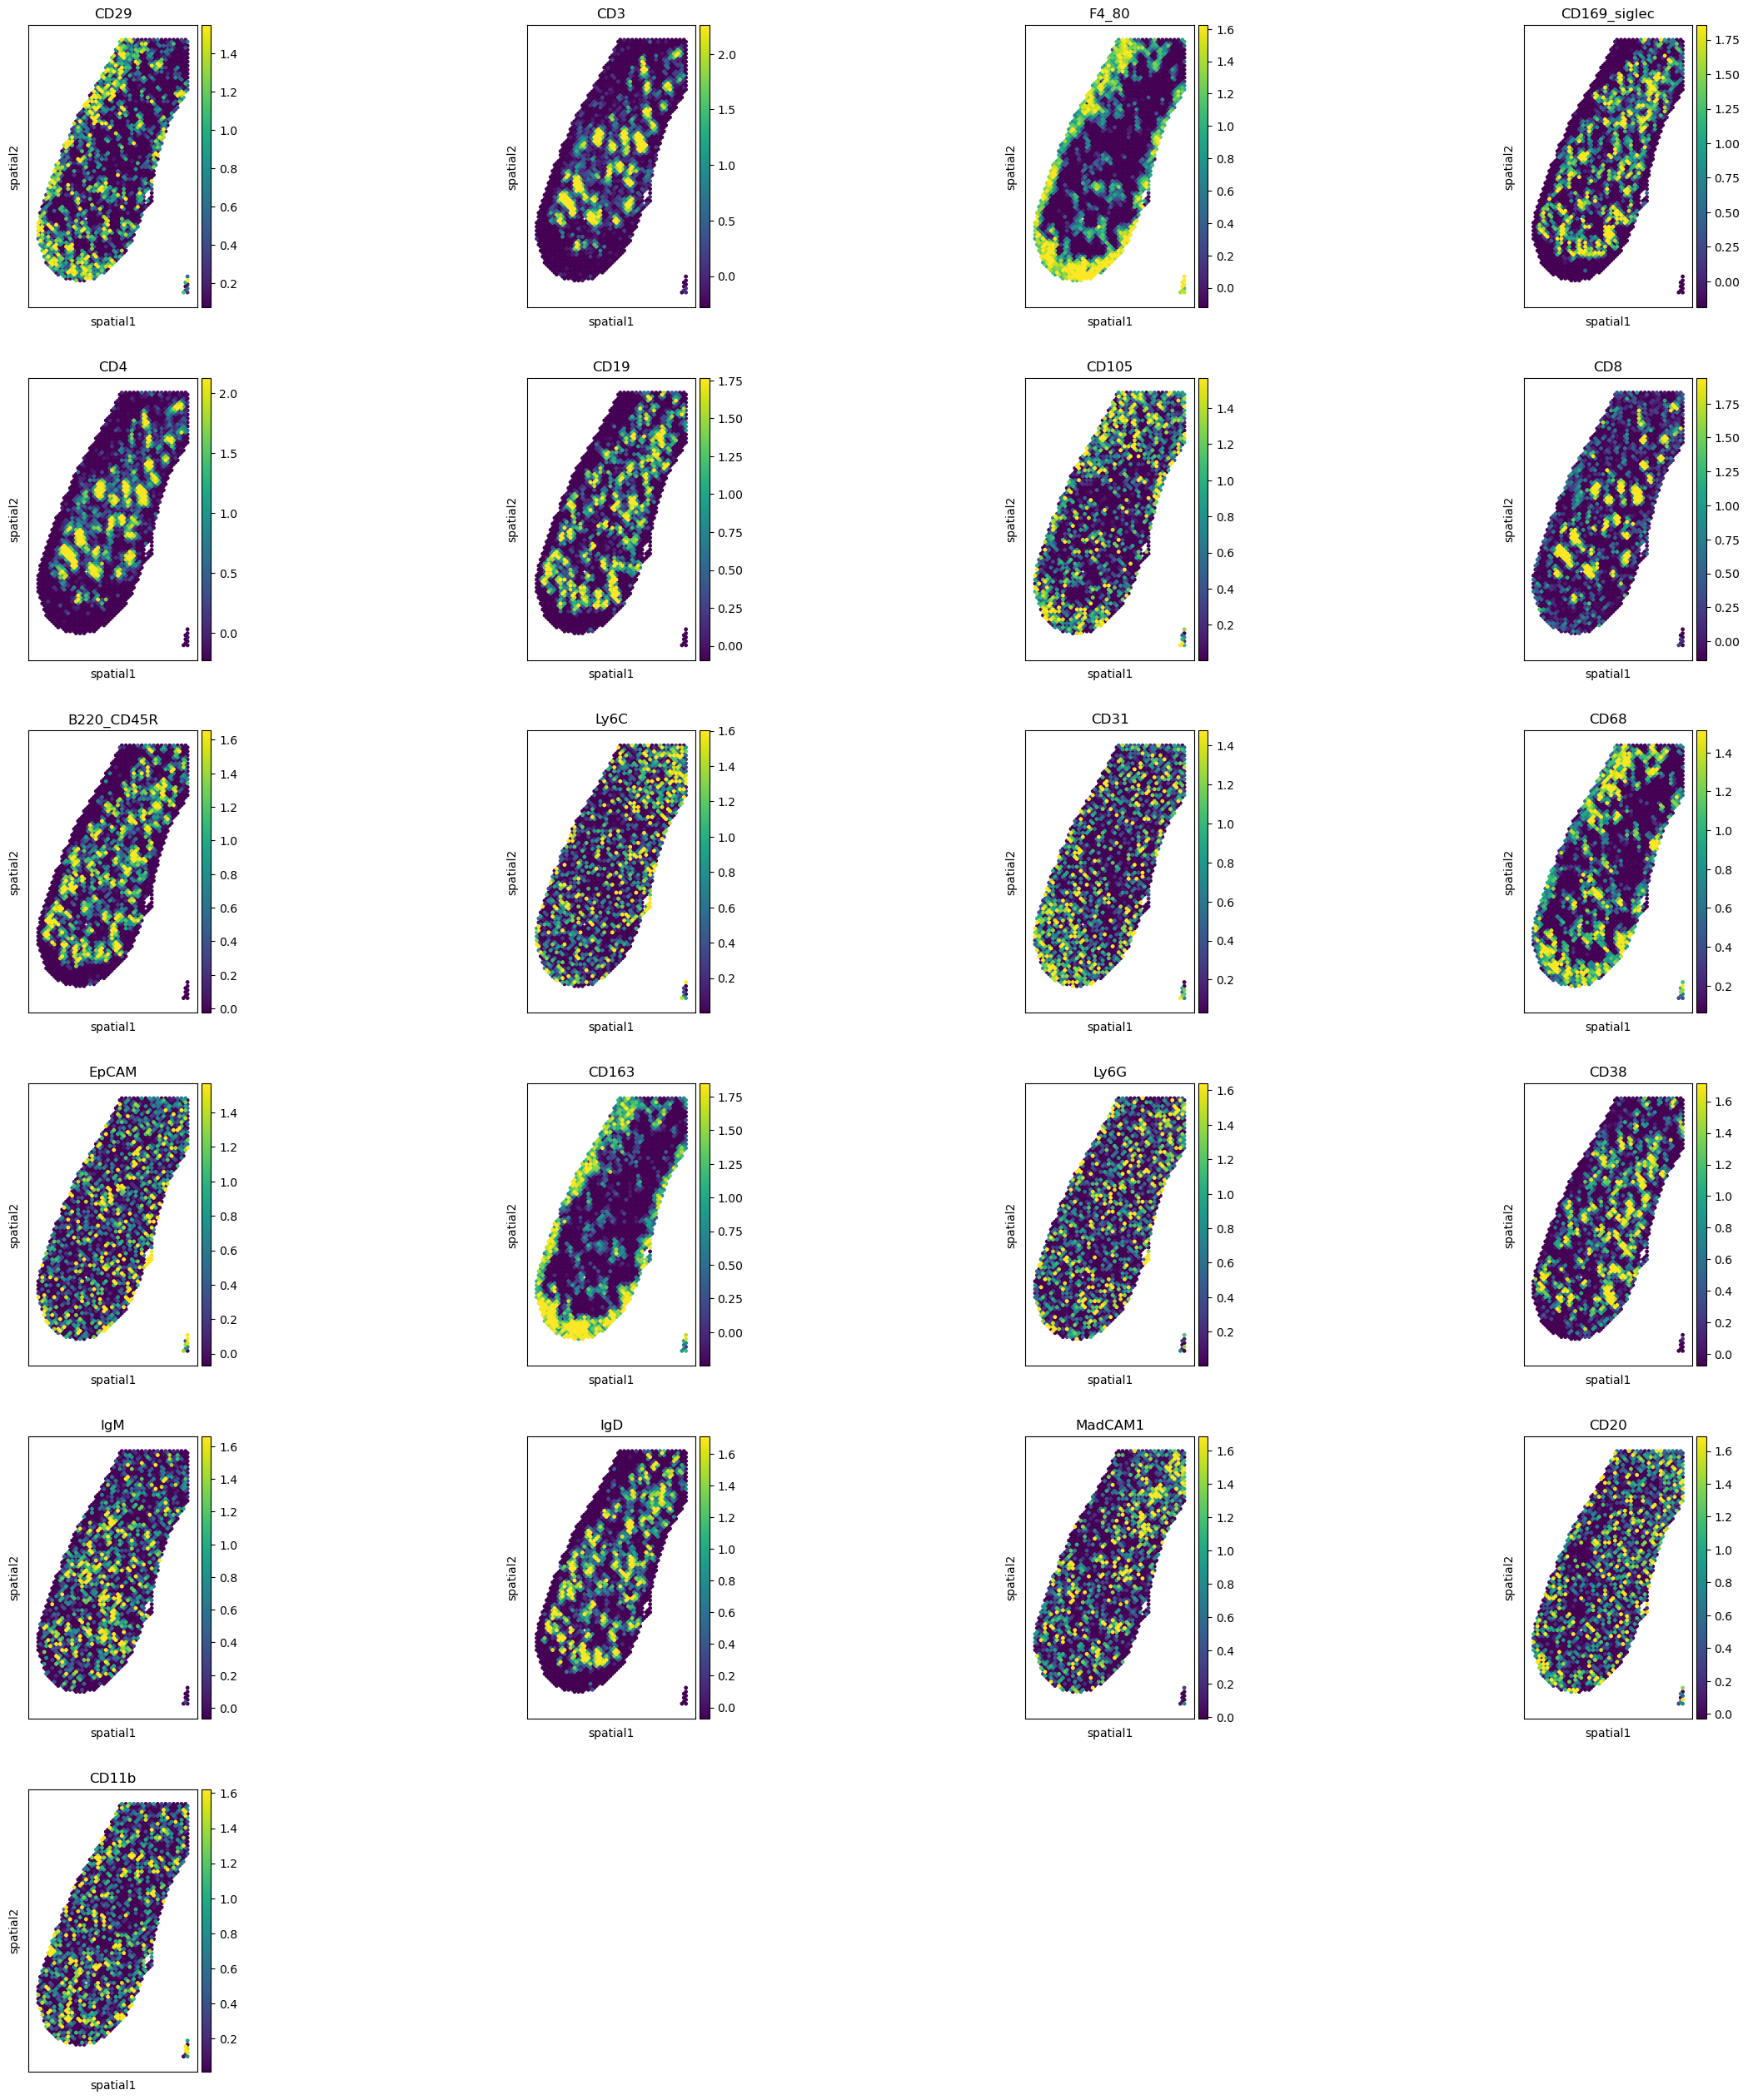

In [40]:
sc.pl.spatial(test_adata_omics2, 
              color=test_adata_omics2.var_names.tolist(),  
              spot_size=2,      
              palette='viridis',   
              vmax='p95',vmin='p50',
              show=True)          
plt.show()

In [41]:
# sc.pl.spatial(test_adata_omics2, 
#               color=['mouse_CD5', 'mouse_CD68', 'mouse_CD4', 'mouse_rat_CD29', 'mouse_CD8a',
#        'mouse_CD3', 'mouse_human_CD44', 'mouse_rat_human_CD27', 'mouse_CD90_2',
#        'mouse_CD11c', 'mouse_CD31', 'mouse_F4_80', 'mouse_human_CD45R_B220',
#        'Rat_IgG2a', 'mouse_human_CD11b', 'mouse_CD19', 'Mouse_IgG2a',
#        'mouse_Siglec_H', 'mouse_CD169_Siglec-1'],  
#               spot_size=100,      
#               palette='viridis',   
#               vmax='p95',vmin='p50',
#               show=True)          
# plt.show()

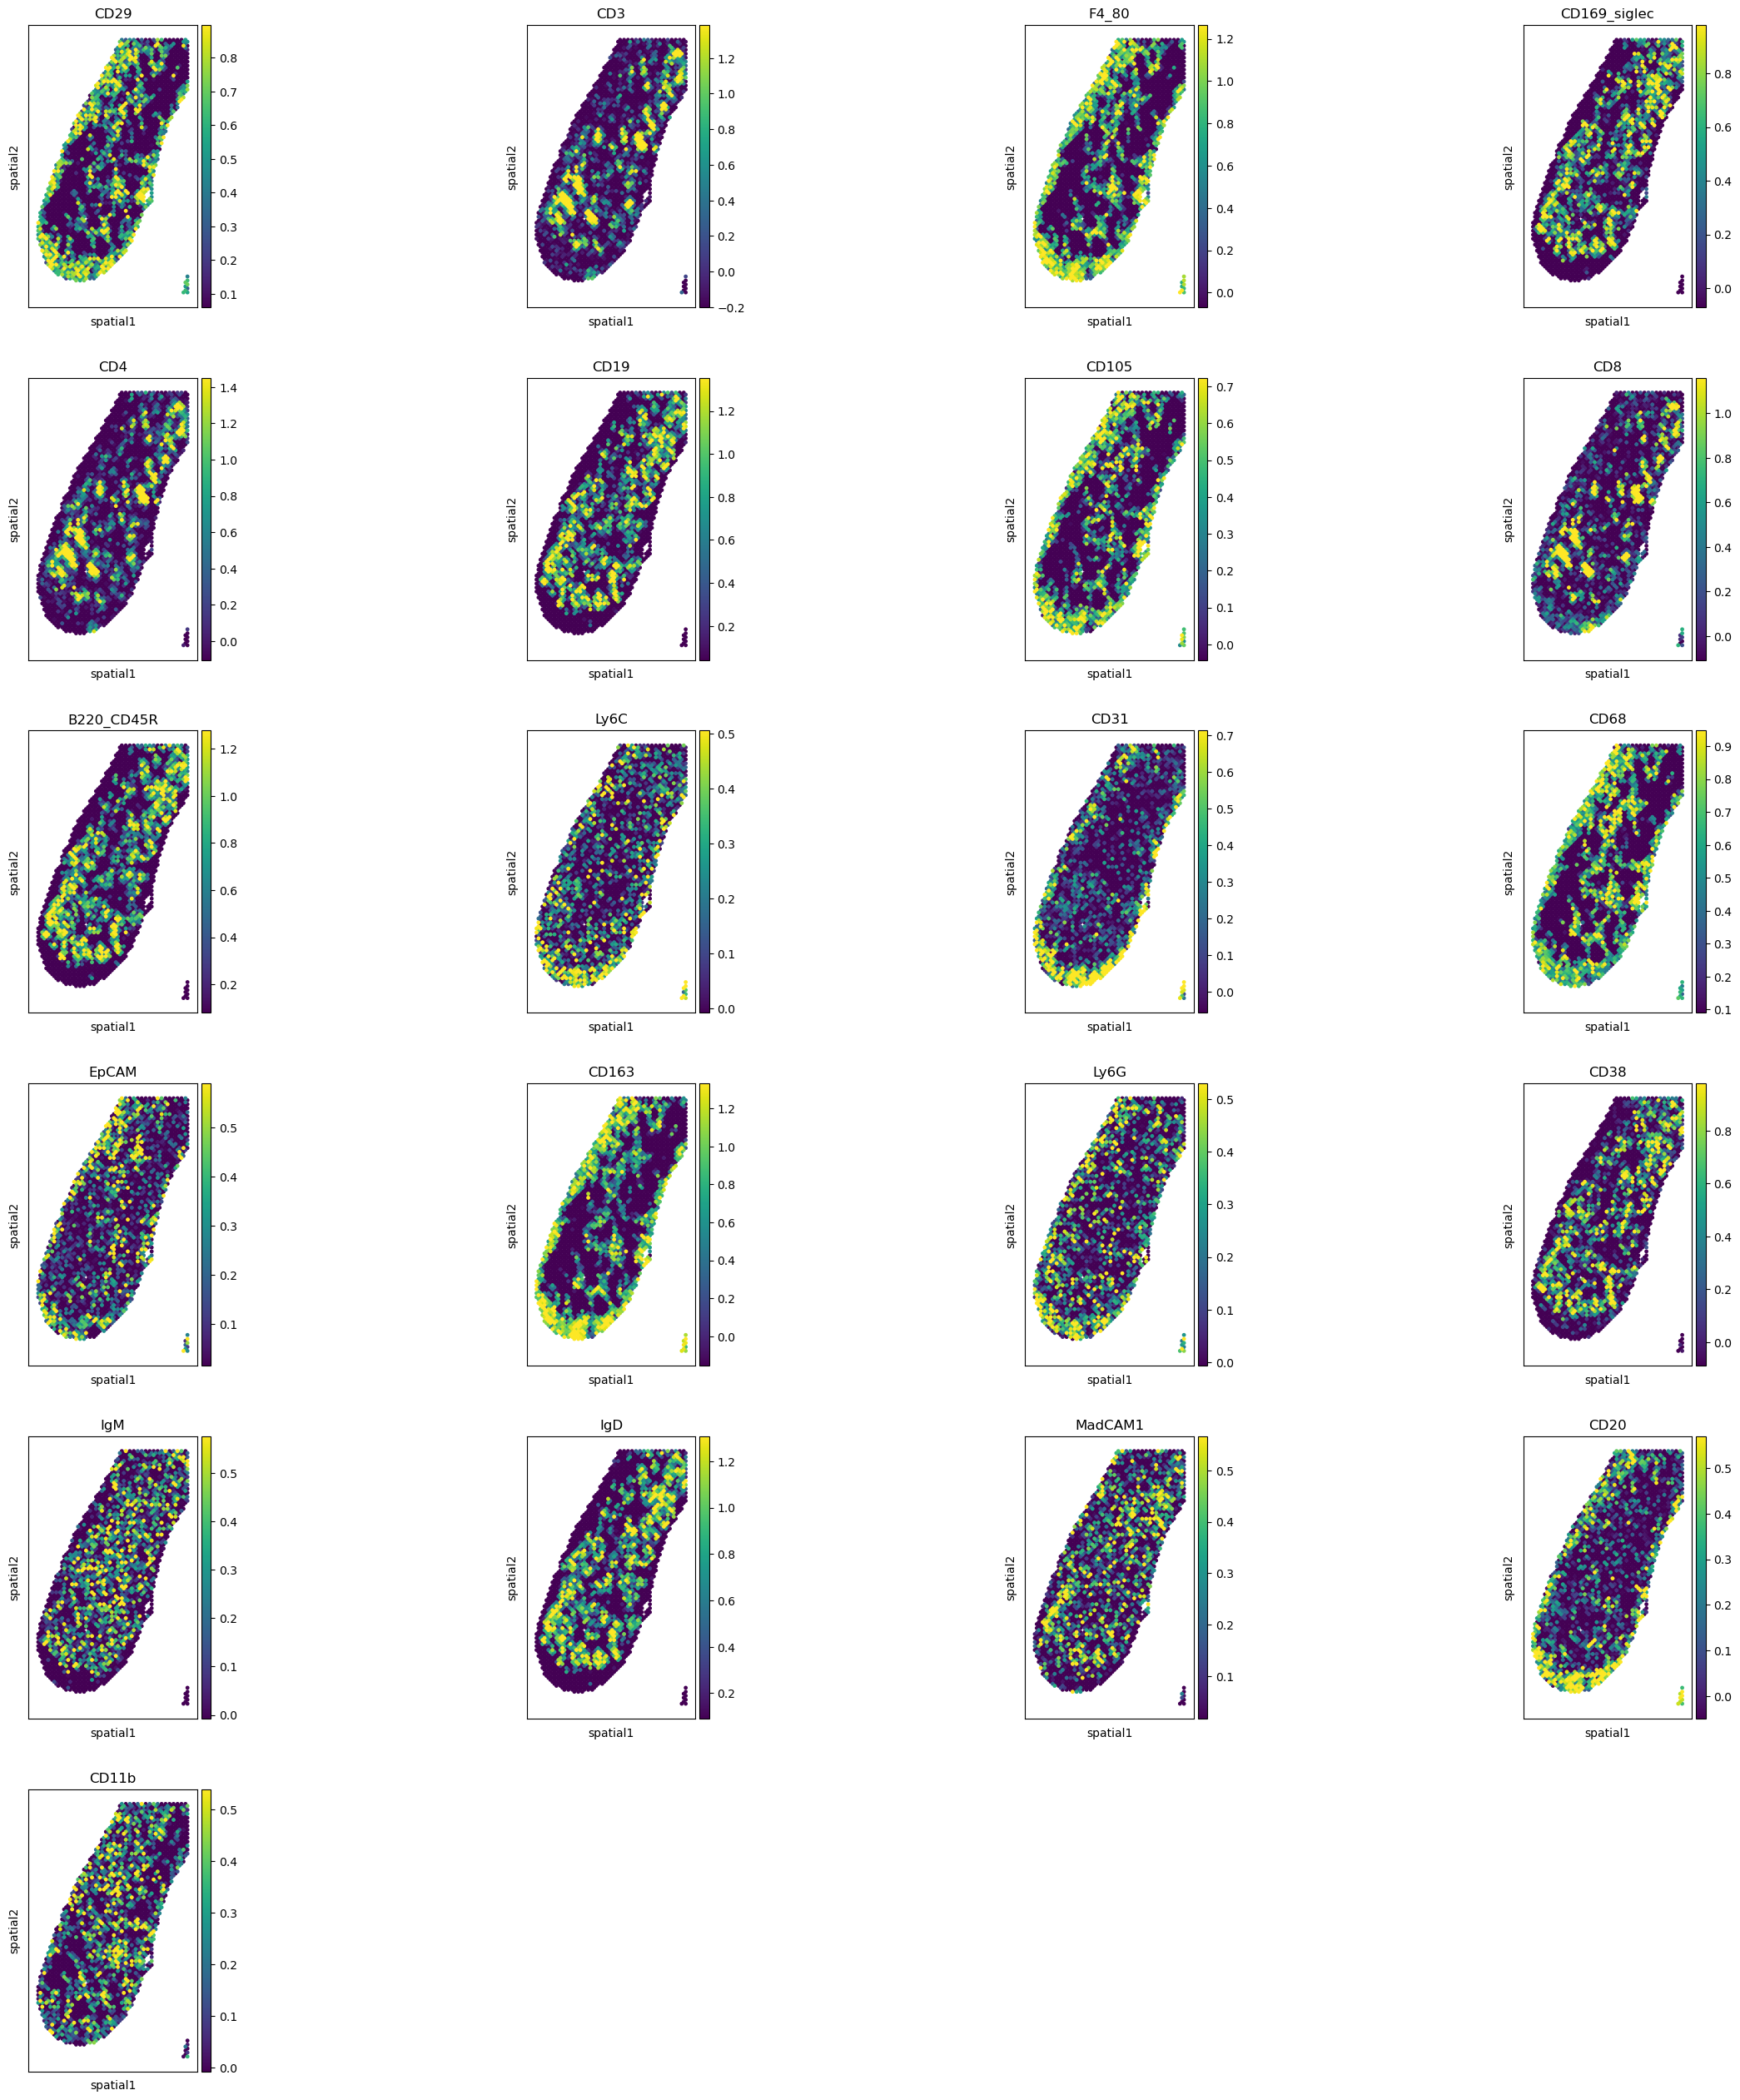

In [42]:
sc.pl.spatial(predict, 
              color=test_adata_omics2.var_names.tolist(),  
              spot_size=2,      
              palette='viridis',   
              vmax='p95',vmin='p50',
              show=True)          
plt.show()

In [43]:
# sc.pl.spatial(predict, 
#               color=['mouse_CD5', 'mouse_CD68', 'mouse_CD4', 'mouse_rat_CD29', 'mouse_CD8a',
#        'mouse_CD3', 'mouse_human_CD44', 'mouse_rat_human_CD27', 'mouse_CD90_2',
#        'mouse_CD11c', 'mouse_CD31', 'mouse_F4_80', 'mouse_human_CD45R_B220',
#        'Rat_IgG2a', 'mouse_human_CD11b', 'mouse_CD19', 'Mouse_IgG2a',
#        'mouse_Siglec_H', 'mouse_CD169_Siglec-1'],  
#               spot_size=100,      
#               palette='viridis',   
#               vmax='p95',vmin='p50',
#               show=True)          
# plt.show()

In [44]:
# data_path = "/data/hulei/ZhaoruiJiang/Benchmark/Results/Mouse_Thymus/"
# path = '/data/hulei/ZhaoruiJiang/Data/STProtein/'
# # name = 'Mouse_Spleen'
# name = 'Mouse_Thymus'
# # name = 'Human_Lymph_Node'
# # output_path = "Results/Mouse_Spleen/"
# # output_path = "Results/Human_Lymph_Node/" 
# output_path = "/data/hulei/ZhaoruiJiang/Benchmark/Results/Mouse_Thymus/" 
# totalVI_path = output_path + name + "_totalVI.csv"
# scArches_path = output_path  + name + "_scArches.csv"
# Dengkw_path = output_path  + name + "_Dengkw.csv"
# cTp_net_path = output_path  + name + "_cTPnet.csv"
# sciPENN_path = output_path  + name + "_sciPENN.csv"

In [45]:
# totalVI_pre = pd.read_csv(totalVI_path,index_col = 0)
# scArches_pre = pd.read_csv(scArches_path,index_col = 0)
# Dengkw_pre = pd.read_csv(Dengkw_path,index_col = 0)
# cTp_net_pre = pd.read_csv(cTp_net_path,index_col = 0).T
# sciPENN_pre = pd.read_csv(sciPENN_path,index_col = 0)

In [46]:
# Dengkw_predict = test_adata_omics2.copy()

In [47]:
# Dengkw_predict.X = Dengkw_pre.values

In [48]:
# sc.pp.normalize_total(Dengkw_predict)
# sc.pp.log1p(Dengkw_predict)
# sc.pp.scale(Dengkw_predict)

In [49]:
# sc.pl.spatial(Dengkw_predict, 
#               color=['mouse_CD5', 'mouse_CD68', 'mouse_CD4', 'mouse_rat_CD29', 'mouse_CD8a',
#        'mouse_CD3', 'mouse_human_CD44', 'mouse_rat_human_CD27', 'mouse_CD90_2',
#        'mouse_CD11c', 'mouse_CD31', 'mouse_F4_80', 'mouse_human_CD45R_B220',
#        'Rat_IgG2a', 'mouse_human_CD11b', 'mouse_CD19', 'Mouse_IgG2a',
#        'mouse_Siglec_H', 'mouse_CD169_Siglec-1'],  
#               spot_size=100,      
#               palette='viridis',   
#               vmax='p95',vmin='p50',
#               show=True)          
# plt.show()

In [50]:
test_z.to('cpu').detach().numpy().shape

(2768, 21)

In [51]:
prediction = predict.copy()
prediction.obsm['embedding'] = test_z.to('cpu').detach().numpy()

In [52]:

import os
# the location of R, which is required for the 'mclust' algorithm. Please replace the path below with local R installation path
os.environ['R_HOME'] = '/opt/miniforge/envs/STAligner/lib/R'
# we set 'mclust' as clustering tool by default. Users can also select 'leiden' and 'louvain'
tool = 'mclust' # mclust, leiden, and louvain
# stp.pl.utils.clustering(true_adata, key='embedding', add_key='embedding', n_clusters=5, method=tool, use_pca=True)

In [140]:
from utils import clustering
clustering(prediction, key='embedding', add_key='embedding', n_clusters=5, method=tool, use_pca=True)

fitting ...
  |======================================================================| 100%


  |======================================================================| 100%


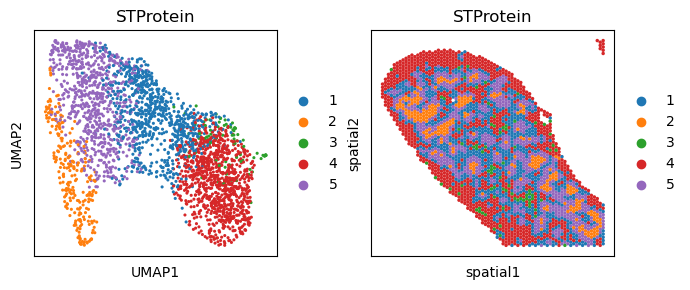

In [141]:
# visualization
import matplotlib.pyplot as plt
fig, ax_list = plt.subplots(1, 2, figsize=(7, 3))
sc.pp.neighbors(prediction, use_rep='embedding', n_neighbors=10)
sc.tl.umap(prediction)

sc.pl.umap(prediction, color='embedding', ax=ax_list[0], title='STProtein', s=20, show=False)
sc.pl.embedding(prediction, basis='spatial', color='embedding', ax=ax_list[1], title='STProtein', s=25, show=False)

plt.tight_layout(w_pad=0.3)
plt.show()

In [55]:
ground_truth = sc.read_h5ad('/data/hulei/ZhaoruiJiang/Data/SpatialGlue/Ground-Truth/' + "adata_all_mouse_spleen_rep2.h5ad")

In [56]:
label = ground_truth.obs['Pro_label_new']
list = label.tolist()
path_1 = 'GT_list'
with open(path_1, 'w') as f:
    for num in list:
        f.write(f"{num}\n")

In [57]:
label = prediction.obs['mclust']
list = label.tolist()
path_2 = 'Our_list'
with open(path_2, 'w') as f:
    for num in list:
        f.write(f"{num}\n")

In [58]:
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics import v_measure_score, homogeneity_score, completeness_score
from sklearn.metrics import adjusted_rand_score, fowlkes_mallows_score
from metric import jaccard, Dice, F_measure
from sklearn.metrics import silhouette_score

In [59]:
def read_list_from_file(path):
    list = []
    with open(path, 'r') as f:
        for line in f:
            num = int(line.strip())
            list.append(num)
    return list

In [60]:
GT_list = read_list_from_file(path_1)
Our_list = read_list_from_file(path_2)

In [61]:
Our_Jaccard = jaccard(Our_list, GT_list)
print(f"our         jaccard: {Our_Jaccard*100:.6f}")
Our_F_measure = F_measure(Our_list, GT_list)
print(f"our         F_measure: {Our_F_measure*100:.6f}")
Our_mutual_info = mutual_info_score(GT_list, Our_list)
print(f"our         Mutual Information: {Our_mutual_info*100:.6f}")
Our_nmi = normalized_mutual_info_score(GT_list, Our_list)
print(f"Our         (NMI): {Our_nmi*100:.6f}")
Our_ami = adjusted_mutual_info_score(GT_list, Our_list)
print(f"Our         (AMI): {Our_ami*100:.6f}")
Our_V = v_measure_score(GT_list, Our_list)
print(f"Our         V-measure: {Our_V*100:.6f}")
Our_homogeneity = homogeneity_score(GT_list, Our_list)
Our_completeness = completeness_score(GT_list, Our_list)
print(f"Our         Homogeneity: {Our_homogeneity*100:.6f} Completeness: {Our_completeness*100:.6f}")
Our_ari = adjusted_rand_score(GT_list, Our_list)
print(f"Our         (ARI): {Our_ari*100:.6f}")
Our_fmi = fowlkes_mallows_score(GT_list, Our_list)
print(f"Our         (FMI): {Our_fmi*100:.6f}")

our         jaccard: 32.929125
our         F_measure: 49.543883
our         Mutual Information: 40.883302
Our         (NMI): 29.140201
Our         (AMI): 28.992614
Our         V-measure: 29.140201
Our         Homogeneity: 28.968153 Completeness: 29.314306
Our         (ARI): 30.548027
Our         (FMI): 49.548039


In [62]:
new_predict = predict.copy()
# sc.pp.scale(new_predict)

In [63]:
new_predict.to_df()

CD29       CD3     F4_80  CD169_siglec       CD4  \
AAACACCAATAACTGC-1 -0.306262 -0.467365  0.121049      0.258075  0.224007   
AAACAGAGCGACTCCT-1 -1.236795  0.870911 -1.573112      0.691100  0.958834   
AAACAGCTTTCAGAAG-1  0.332589 -0.661657  1.421125     -0.821718 -0.546340   
AAACAGGGTCTATATT-1  0.539026 -0.561439  1.363257     -0.663927 -0.674891   
AAACATGGTGAGAGGA-1  0.773737 -0.242613  0.871865     -1.163003 -0.143406   
...                      ...       ...       ...           ...       ...   
TTGTTCAGTGTGCTAC-1 -0.214853  0.417056 -0.411328     -0.010407  0.529836   
TTGTTGTGTGTCAAGA-1 -0.718496 -0.335149 -1.106789      0.746767 -0.038761   
TTGTTTCACATCCAGG-1 -0.446810  0.222414 -0.851121      0.658962  0.188000   
TTGTTTCATTAGTCTA-1 -0.329357 -0.453956 -0.397875      0.573382 -0.085344   
TTGTTTCCATACAACT-1  0.141437 -0.387479 -0.403171      0.656140  0.056048   

                        CD19     CD105       CD8  B220_CD45R      Ly6C  ...  \
AAACACCAATAACTGC-1  0.183784 -0.348536 -0.551249    0.211182 -0.819383  ...   
AAACAGAGCGACTCCT-1  1.282621 -0.639785  0.386618    1.157657  0.042524  ...   
AAACAGCTTTCAGAAG-1 -0.718842  0.360317 -0.359884   -0.597309 -0.312595  ...   
AAACAGGGTCTATATT-1 -0.792715  0.555091 -0.505169   -0.876217 -0.075891  ...   
AAACATGGTGAGAGGA-1 -1.045958  0.472714  0.305830   -1.181180 -0.366068  ...   
...                      ...       ...       ...         ...       ...  ...   
TTGTTCAGTGTGCTAC-1 -0.115984 -0.481990  0.034507    0.226474 -0.118235  ...   
TTGTTGTGTGTCAAGA-1  1.467604 -0.302312 -0.628330    1.196198 -0.028678  ...   
TTGTTTCACATCCAGG-1  0.851322 -0.499103 -0.149873    1.035541  0.299324  ...   
TTGTTTCATTAGTCTA-1  0.665949 -0.368900 -0.832752    0.894540  0.100951  ...   
TTGTTTCCATACAACT-1  0.358983  0.033864 -0.646011    0.622169 -0.348124  ...   

                        CD68     EpCAM     CD163      Ly6G      CD38  \
AAACACCAATAACTGC-1 -0.163613 -0.397933 -0.136683 -0.070053  0.256748   
AAACAGAGCGACTCCT-1 -1.406775 -0.045421 -1.241480  0.435809  0.930370   
AAACAGCTTTCAGAAG-1  0.513219  0.306683  1.431417  0.573987  0.010546   
AAACAGGGTCTATATT-1  0.728223 -0.027595  1.155972  0.061012 -0.392616   
AAACATGGTGAGAGGA-1  0.765691  0.699039  1.055948  0.404907 -0.331629   
...                      ...       ...       ...       ...       ...   
TTGTTCAGTGTGCTAC-1 -0.138906 -0.140502 -0.530901  0.238870  0.090274   
TTGTTGTGTGTCAAGA-1 -1.098967 -0.340020 -0.996762  0.069176  0.714250   
TTGTTTCACATCCAGG-1 -0.965790  0.049876 -0.963695  0.099445  0.595589   
TTGTTTCATTAGTCTA-1 -0.678308 -0.222529 -0.850378  0.121621  0.153895   
TTGTTTCCATACAACT-1  0.055671 -0.356357 -0.183086 -0.207641  0.619062   

                         IgM       IgD   MadCAM1      CD20     CD11b  
AAACACCAATAACTGC-1 -0.012635  0.521649 -0.103175 -0.551003  0.018376  
AAACAGAGCGACTCCT-1 -0.058940  1.287510  0.257069 -0.111012 -0.526203  
AAACAGCTTTCAGAAG-1 -0.348423 -0.322988 -0.334885  0.251560  0.317761  
AAACAGGGTCTATATT-1 -0.062164 -1.025237 -0.867685  0.295232  0.221746  
AAACATGGTGAGAGGA-1 -0.815371 -1.184736 -0.714732  0.074350  0.178696  
...                      ...       ...       ...       ...       ...  
TTGTTCAGTGTGCTAC-1  0.236700  0.166102 -0.511608 -0.066860  0.279683  
TTGTTGTGTGTCAAGA-1  0.366384  1.326404  0.335624 -0.335001 -0.416862  
TTGTTTCACATCCAGG-1  0.368214  0.819394 -0.043069 -0.011307 -0.128363  
TTGTTTCATTAGTCTA-1  0.363046  0.499085 -0.222319 -0.288162 -0.311232  
TTGTTTCCATACAACT-1  0.252472  0.123159 -0.230097 -0.065098  0.085055  

[2768 rows x 21 columns]

In [64]:
STProtein_pre = pd.DataFrame(data = new_predict.X,index = new_predict.obs_names,columns = new_predict.var_names)

In [65]:
STProtein_pre.to_csv("_STProtein.csv")
# STProtein_pre.to_csv(output_path+name+"_STProtein.csv")

In [66]:
STProtein_pcc_protein = []
from scipy.stats import pearsonr
for i in range(STProtein_pre.shape[1]):
    x = np.array(STProtein_pre[STProtein_pre.columns[i]])
    y = np.array(test_adata_omics2.to_df()[STProtein_pre.columns[i]])    
    pcc = pearsonr(x,y)[0]
    STProtein_pcc_protein.append(pcc)

In [67]:
STProtein_pcc_protein

[0.541772146304323,
 0.682259544083857,
 0.7452812535757855,
 0.5122523807409468,
 0.6633448549216359,
 0.6621635919085078,
 0.28869111223964694,
 0.5939459812575942,
 0.6588019579516745,
 0.11996301632112025,
 0.2626062026050444,
 0.6463285686687876,
 0.010655538408119456,
 0.732213945943532,
 0.017758036883288593,
 0.4668693193943872,
 0.142711841794636,
 0.6937997822742143,
 0.09449987494494337,
 0.06575810232703397,
 0.1110704454561087]

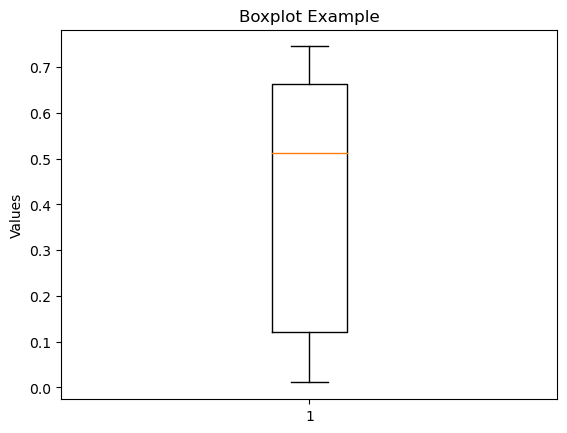

In [68]:
plt.boxplot(STProtein_pcc_protein)
plt.title("Boxplot Example")
plt.ylabel("Values")
plt.show()

In [142]:
prediction.obs['STProtein_number'] = prediction.obs['embedding'].copy()

# 'MZMØ' represents marginal zone macrophage, 'MMMØ' represents marginal metallophilic macrophages, 'RpMØ' represents red pulp macrophage
prediction.obs['embedding'].cat.rename_categories({1: 'MZMØ',
                                                   2: 'T cell',
                                                   3: 'MMMØ',
                                                   4: 'RpMØ',
                                                   5: 'B cell'
                                                   }, inplace=True)

In [151]:
import pandas as pd
list_ = ['RpMØ','MZMØ','MMMØ','B cell', 'T cell']
prediction.obs['embedding']  = pd.Categorical(prediction.obs['embedding'],
                      categories=list_,
                      ordered=True)

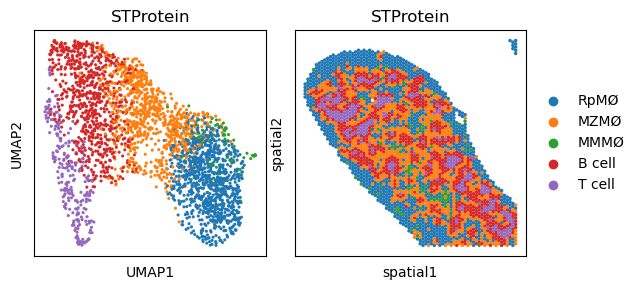

In [152]:
# plotting with annotation
fig, ax_list = plt.subplots(1, 2, figsize=(6.5, 3))

sc.pl.umap(prediction, color='embedding', ax=ax_list[0], title='STProtein', s=20, show=False)
sc.pl.embedding(prediction, basis='spatial', color='embedding', ax=ax_list[1], title='STProtein', s=25, show=False)
ax_list[0].get_legend().remove()

plt.tight_layout(w_pad=0.3)
plt.show()